In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:

def posterior(x, data_value=100, data_std=15):
    return np.exp(-(x - data_value)**2 / (2 * data_std**2))


In [3]:

# Metropolis algorithm for MCMC sampling
def metropolis(num_samples, initial_value, proposal_std, data_value=100, data_std=15):
    samples = [initial_value]
    for _ in range(num_samples - 1):
        current_sample = samples[-1]
        
        # Generate a new proposal
        proposal = np.random.normal(current_sample, proposal_std)
        
        # Calculate posterior probabilities
        posterior_current = posterior(current_sample)
        posterior_proposal = posterior(proposal)
        
        # Accept or reject the proposal
        if posterior_proposal >= posterior_current or np.random.rand() < posterior_proposal / posterior_current:#acceptance ratio
            samples.append(proposal)
        else:
            samples.append(current_sample)
    
    return np.array(samples)


In [4]:

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_samples = 1000
initial_value = 250
proposal_std = 5

# Run Metropolis algorithm
samples = metropolis(num_samples, initial_value, proposal_std)


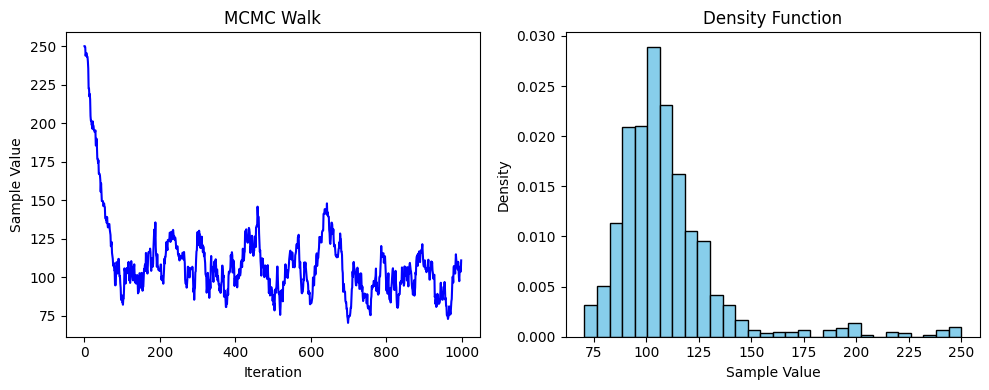

Standard Deviation: 25.91
Expectation: 109.76


In [5]:

# Plot MCMC walk
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(samples, linestyle='-', color='b')
plt.title('MCMC Walk')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')

# Plot density function
plt.subplot(1, 2, 2)
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Density Function')
plt.xlabel('Sample Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate and print standard deviation and expectation
std_dev = np.std(samples)
expectation = np.mean(samples)

print(f'Standard Deviation: {std_dev:.2f}')
print(f'Expectation: {expectation:.2f}')



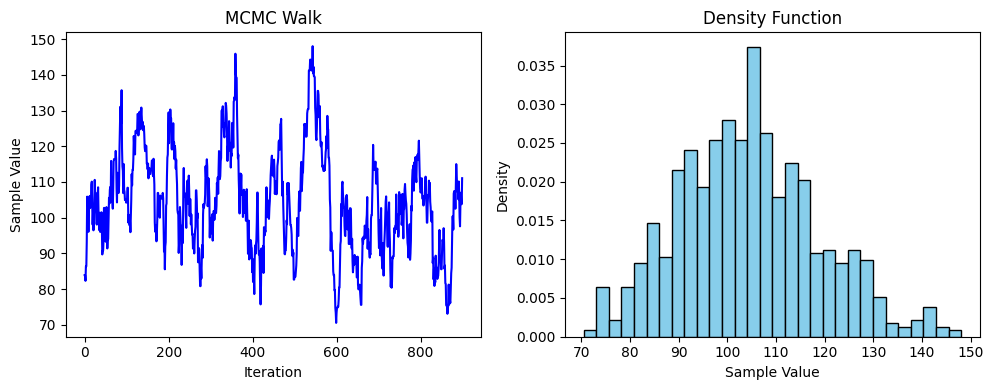

Standard Deviation: 14.35
Expectation: 104.39


In [6]:
#remove burn-in
burn_in = 100
samples = samples[burn_in:]
std_dev = np.std(samples)
expectation = np.mean(samples)

# Plot MCMC walk
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(samples, linestyle='-', color='b')
plt.title('MCMC Walk')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')

# Plot density function
plt.subplot(1, 2, 2)
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Density Function')
plt.xlabel('Sample Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate and print standard deviation and expectation
std_dev = np.std(samples)
expectation = np.mean(samples)

print(f'Standard Deviation: {std_dev:.2f}')
print(f'Expectation: {expectation:.2f}')


In [7]:

def beta(i,j):
    # factorial (i-1) * factorial (j-1) / factorial (i+j-1)
    return math.factorial(i+j-1)/(math.factorial(i-1) * math.factorial(j-1))  #beta function


def beta_distribution(x,a,b): #pdf of beta distribution
    return beta(a,b)*(x**(a-1))*((1-x)**(b-1))


10 4


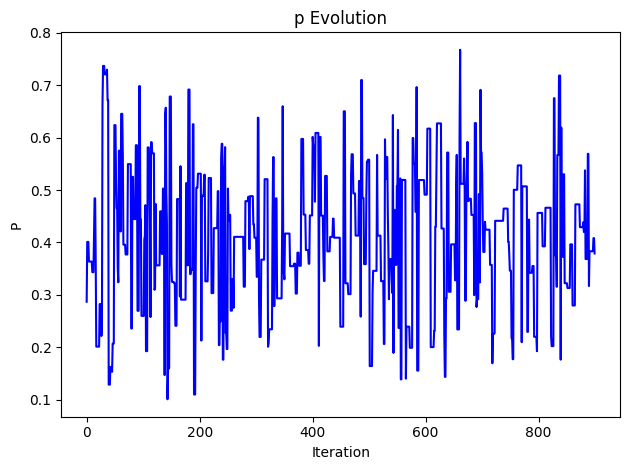

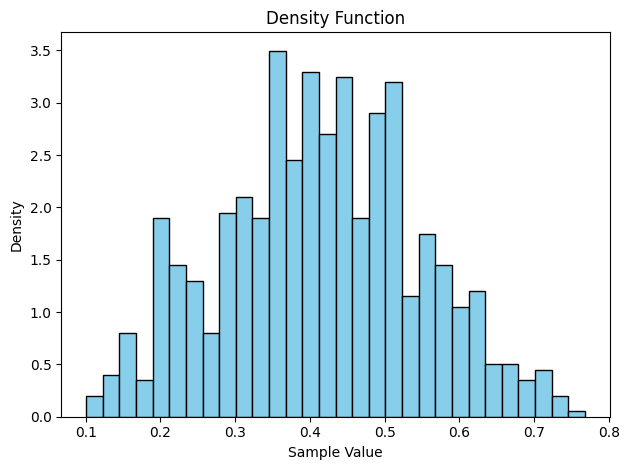

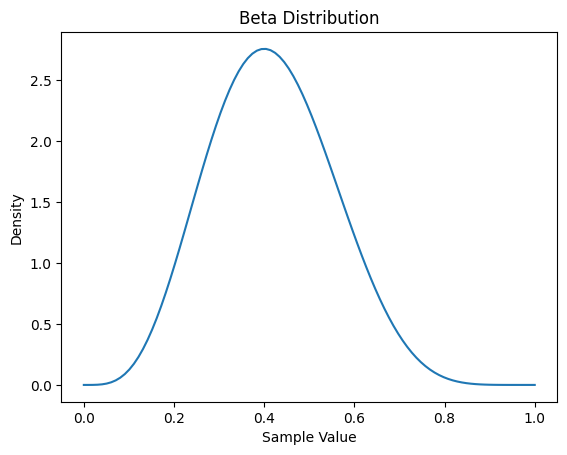

samples mean 0.41353233770625314
actual mean 0.4


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Function to calculate the likelihood of data given P
def likelihood(data, P):
    s = np.sum(data)
    return P**s * (1 - P)**(len(data) - s)


# Function to calculate the prior distribution (Uniform in this case)
def prior(P):
    return 1 if 0 <= P <= 1 else 0


# Function to calculate the unnormalized posterior distribution
def posterior(data, P):
    return likelihood(data, P) * prior(P)


# Metropolis algorithm for sampling from the posterior distribution
def metropolis(num_samples, initial_value, data):
    p=initial_value
    samples = [p]
    
    for _ in range(num_samples - 1):
        # Propose new values for alpha and beta
        proposed= np.random.normal(p, 0.5)
        
        # Calculate unnormalized posterior for current and proposed values
        posterior_current = posterior(data, p)
        posterior_proposed = posterior(data, proposed)
        
        # Accept or reject the proposal
        if posterior_proposed >= posterior_current or np.random.rand() < posterior_proposed / posterior_current:
            p=proposed
        
        samples.append(p)
    
    return np.array(samples)


# Set random seed for reproducibility
np.random.seed(13)

# Parameters
num_samples = 1000
initial_value = 1  # Initial values for alpha and beta
data = np.array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1])  # Example data
n=len(data)
s=np.sum(data)
print(n,s)

# Run Metropolis algorithm
samples = metropolis(num_samples, initial_value, data)
samples=samples[100:]
values=[beta_distribution(x,s+1,n-s+1) for x in samples]


# Plot the evolution of alpha and beta over iterations
# plt.figure(figsize=(15, 7))
# plt.subplot(1, 3, 1)
plt.plot(samples, linestyle='-', color='b')
plt.title('p Evolution')
plt.xlabel('Iteration')
plt.ylabel('P')

plt.tight_layout()
plt.show()

#plot density
# plt.subplot(1, 3, 2)
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Density Function')
plt.xlabel('Sample Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

#plot beta distribution
# plt.subplot(1, 3, 3)
x=np.linspace(0,1,100)
y=[beta_distribution(x,a=s+1,b=n-s+1) for x in x]
plt.plot(x,y)
plt.title('Beta Distribution')
plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.show()


print(f"samples mean {np.mean(samples)}" )
print(f"actual mean {np.mean(data)}" )


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial,gammainc


In [10]:

def likelihood(lam, s, N):
    return (lam**N) * np.exp(-lam * s)

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

def prior(lam):
    return 1 if 0 <= lam <= 1 else 0

def posterior(lam, s, N):
    return likelihood(lam, s, N) * prior(lam)


In [11]:

np.random.seed(42)
N = 10
data=np.random.exponential(scale=1.0, size=N)
s = np.sum(data)
print(s)


10.269700779013212


In [12]:
# Define range of lambda values
lambda_range = np.linspace(0.001, 1, 1000)

# Calculate the likelihood function λ^Ne^(-λ⋅s)
likelihood_values = likelihood(lambda_range, s, N)


In [13]:

# MCMC sampling
num_iterations = 20000
burn_in = num_iterations // 4
lambda_samples = []

lambda_current = 0 # Initial value for lambda

for i in range(num_iterations):
    lambda_proposed = np.random.normal(lambda_current, 0.005)
    
    # Calculate likelihoods
    likelihood_current = posterior(lambda_current, s, N)
    likelihood_proposed = posterior(lambda_proposed, s, N)
    
    # Calculate acceptance ratio without prior probability
    acceptance_ratio = likelihood_proposed / likelihood_current#acceptance ratio
    
    # Accept or reject the proposed value
    if np.random.uniform() < min(acceptance_ratio, 1):
        lambda_current = lambda_proposed
    
    if i > burn_in:  # Discard burn-in samples
        lambda_samples.append(lambda_current)


C:\Users\gupta\AppData\Local\Temp\ipykernel_19692\2758457866.py:16: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = likelihood_proposed / likelihood_current#acceptance ratio
C:\Users\gupta\AppData\Local\Temp\ipykernel_19692\2758457866.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_ratio = likelihood_proposed / likelihood_current#acceptance ratio


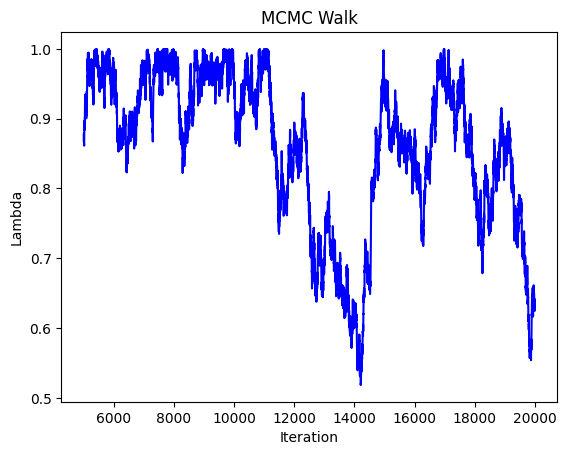

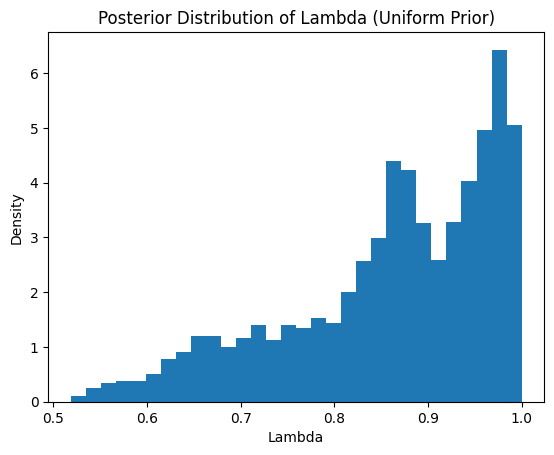

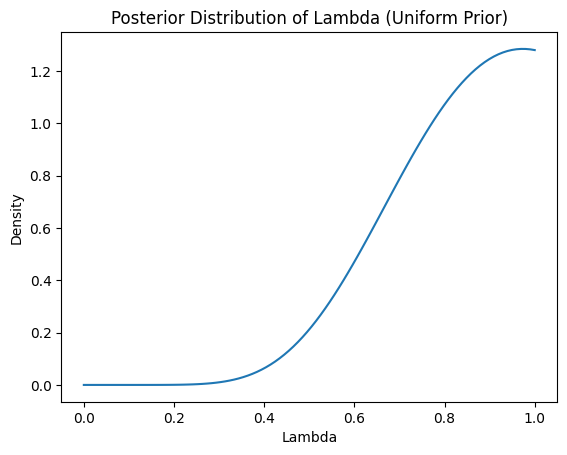

sample mean 0.8603898417314878
actual mean 0.4525540326894517


In [14]:
# Plotting MCMC walk
plt.plot([i for i in range(burn_in+1,num_iterations)],lambda_samples, linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Lambda')
plt.title('MCMC Walk')
plt.show()

# Plotting density function
plt.hist(lambda_samples, bins=30, density=True)
plt.xlabel('Lambda')
plt.ylabel('Density')
plt.title('Posterior Distribution of Lambda (Uniform Prior)')
plt.show()

# Plotting posterior distribution
def func(lam,n,s):
    x=((lam**n)*(np.exp(-lam*s)))
    y=(s**(-n-1)*(gamma(n+1)-gammainc(n+1,s)))
    z=x/y
    return z


lam=np.linspace(0,1,100)
y=[func(i,N,s) for i in lam]
plt.plot(lam,y)
plt.title('Posterior Distribution of Lambda (Uniform Prior)')
plt.xlabel('Lambda')
plt.ylabel('Density') 
plt.show()

print(f"sample mean {np.mean(lambda_samples)}")
print(f"actual mean {np.mean(y)}")